In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/SI699/100.zip" -d "/content"

In [ ]:
!pip install keras==2.6.0
!pip install tensorflow==2.6.0

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import os
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 14 20:13:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


# Training Set & Testing Set

In [ ]:
# Read a sample
import cv2
folder_name = '/content/100/1/'
filename = '0' + '.jpg'
img = cv2.imread(folder_name + filename, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
print(img.shape)

(100, 100, 1)


In [ ]:
print(img[:, :, 0])

[[153 147 138 ... 174 175 177]
 [143 134 124 ... 175 177 178]
 [139 127 115 ... 178 179 180]
 ...
 [  9  11  14 ... 133 134 132]
 [  9  12  11 ... 133 133 132]
 [  6  12  10 ... 131 131 131]]


In [ ]:
def readImages(folder_name, num):
    images = []
    count = 0
    for name in os.listdir(folder_name):
      try:
        img = cv2.imread(folder_name + name, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
      except:
        print(name)
      images.append(img)
      count += 1
      if count == num:
        break
    matrix = np.stack(images, axis=0)
    return matrix

In [ ]:
images_0 = readImages('/content/100/0/', 5000)
images_1 = readImages('/content/100/1/', 5000)
images_2 = readImages('/content/100/2/', 5000)
images_3 = readImages('/content/100/3/', 5000)

.DS_Store


In [ ]:
print(images_0.shape)
print(images_1.shape)
print(images_2.shape)
print(images_3.shape)

(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)


In [ ]:
labels_0 = np.zeros((5000,1), int)
labels_1 = np.ones((5000,1), int)
labels_2 = np.zeros((5000,1), int)
labels_2.fill(2)
labels_3 = np.zeros((5000,1), int)
labels_3.fill(3)
print(labels_0.shape)
print(labels_1.shape)
print(labels_2.shape)
print(labels_3.shape)

(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)


In [ ]:
labels = np.concatenate((labels_0, labels_1, labels_2, labels_3), axis=0)
y_train_labels = to_categorical(labels)

In [ ]:
images = np.vstack((images_0, images_1, images_2, images_3))

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape)
print(y_train_labels.shape)
print(test_images.shape)
print(y_test_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(4000, 100, 100, 1)
(4000, 4)


# Validation Set

In [ ]:
!unzip "/content/drive/My Drive/SI699/Validation_100.zip" -d "/content"

In [ ]:
count = 500

In [ ]:
images_val_0 = readImages('/content/Validation_100/0/', count)
images_val_1 = readImages('/content/Validation_100/1/', count)
images_val_2 = readImages('/content/Validation_100/2/', count)
images_val_3 = readImages('/content/Validation_100/3/', count)

In [ ]:
validation_images = np.vstack((images_val_0, images_val_1, images_val_2, images_val_3))
val_images = validation_images.astype('float32') / 255

In [ ]:
labels_val_0 = np.zeros((count,1), int)
labels_val_1 = np.ones((count,1), int)
labels_val_2 = np.zeros((count,1), int)
labels_val_2.fill(2)
labels_val_3 = np.zeros((count,1), int)
labels_val_3.fill(3)
print(labels_val_0.shape)
print(labels_val_1.shape)
print(labels_val_2.shape)
print(labels_val_3.shape)

(500, 1)
(500, 1)
(500, 1)
(500, 1)


In [ ]:
print(val_images.shape)

(2000, 100, 100, 1)


In [ ]:
val_labels = np.concatenate((labels_val_0, labels_val_1, labels_val_2, labels_val_3), axis=0)

In [ ]:
y_val_labels = to_categorical(val_labels)


In [ ]:
print(train_images.shape)
print(y_train_labels.shape)
print(val_images.shape)
print(y_val_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(2000, 100, 100, 1)
(2000, 4)


# AlexNet

In [ ]:
# The architecture of AlexNet is referenced from: Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60(6), 84–90. https://doi.org/10.1145/3065386

alex = models.Sequential()
alex.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,1)))
alex.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alex.add(layers.BatchNormalization())

alex.add(layers.Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding="same"))
alex.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alex.add(layers.BatchNormalization())


alex.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alex.add(layers.BatchNormalization())


alex.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alex.add(layers.BatchNormalization())

alex.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alex.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alex.add(layers.BatchNormalization())      


alex.add(layers.Flatten())
alex.add(layers.Dense(4096, activation='relu'))
alex.add(layers.Dropout(0.5))
alex.add(layers.Dense(4096, activation='relu'))
alex.add(layers.Dropout(0.5))
alex.add(layers.Dense(4, activation='softmax'))
alex.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 384)         8

In [ ]:
# Use SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)

# Training
alex.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = alex.fit(train_images, y_train_labels, batch_size=128, epochs=50, validation_data=(val_images, y_val_labels),
       verbose=2)


/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
125/125 - 14s - loss: 1.5955 - accuracy: 0.2767 - val_loss: 1.5519 - val_accuracy: 0.2560
Epoch 2/50
125/125 - 4s - loss: 1.4141 - accuracy: 0.3106 - val_loss: 1.3366 - val_accuracy: 0.3550
Epoch 3/50
125/125 - 4s - loss: 1.2748 - accuracy: 0.3974 - val_loss: 1.2860 - val_accuracy: 0.3955
Epoch 4/50
125/125 - 4s - loss: 1.1844 - accuracy: 0.4501 - val_loss: 1.2973 - val_accuracy: 0.3520
Epoch 5/50
125/125 - 4s - loss: 1.1210 - accuracy: 0.4913 - val_loss: 1.1827 - val_accuracy: 0.4530
Epoch 6/50
125/125 - 4s - loss: 1.0755 - accuracy: 0.5196 - val_loss: 1.2347 - val_accuracy: 0.4240
Epoch 7/50
125/125 - 4s - loss: 1.0226 - accuracy: 0.5433 - val_loss: 1.6880 - val_accuracy: 0.3440
Epoch 8/50
125/125 - 4s - loss: 0.9952 - accuracy: 0.5624 - val_loss: 1.7601 - val_accuracy: 0.3475
Epoch 9/50
125/125 - 4s - loss: 0.9344 - accuracy: 0.5966 - val_loss: 1.0439 - val_accuracy: 0.5240
Epoch 10/50
125/125 - 4s - loss: 0.8862 - accuracy: 0.6216 - val_loss: 1.0314 - val_accuracy: 0.530

In [ ]:
test_loss, test_acc = alex.evaluate(test_images, y_test_labels)

125/125 [==============================] - 1s 5ms/step - loss: 2.4706 - accuracy: 0.6140


In [ ]:
predictions = alex.predict(test_images)

In [ ]:
def plotConfusionMatrix(predictions):
  y_pred=np.argmax(predictions, axis=1)
  y_test=np.argmax(y_test_labels, axis=1)

  confusion_matrix = metrics.confusion_matrix(y_pred, y_test, normalize='true')

  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Neutral", "Happy", "Sad", "Surprise"])
  disp.plot()

  plt.savefig("AlexNet.svg")
  plt.show()

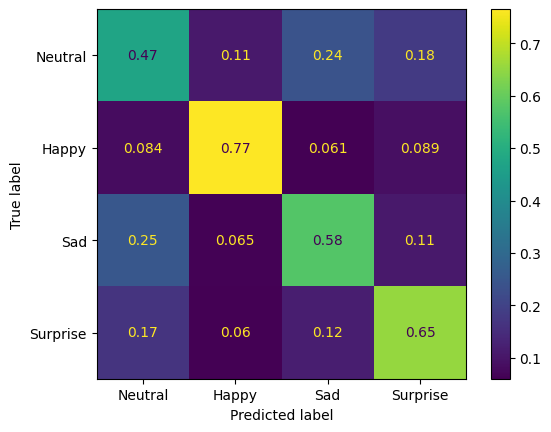

In [ ]:
plotConfusionMatrix(predictions)

In [ ]:
def plotAccuracyandLoss(history, name):
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{name} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['training', 'validation'], loc='upper left')
  plt.savefig(f"{name}_acc.svg")
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


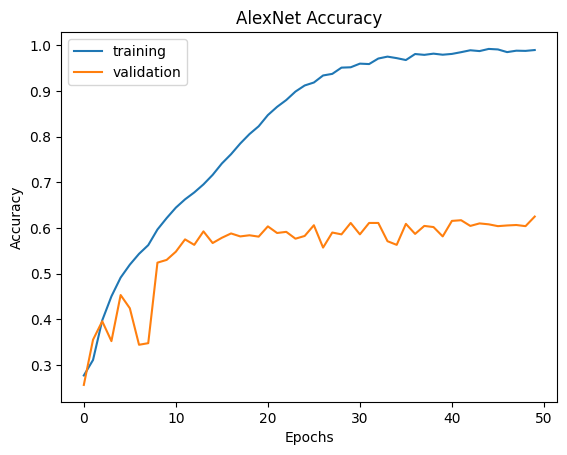

In [ ]:
plotAccuracyandLoss(history, "AlexNet")